# Time Series Analysis of NAICS: North American employment data from 1997 to 2019


Import necessary libraries

In [2]:
import os
import pandas as pd
import numpy as np
import datetime as dt
from glob import glob
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
from tqdm import tqdm
warnings.filterwarnings('ignore')

## I. Data loading and cleaning

In [3]:
def create_n_digits_df(data_path, n):
    """
    Make pandas dataframe from all n digits code industries, ordered 
    from the oldest (Jan 1997) to the newest (Dec 2019)

    Parameter:
    ----------
    data_path : str or Pathlike object
        Path to the CSV data files

    n :int
        Number of digits in NAICS code

    Returns:
    -------
    pandas.core.frame.DataFrame:
        DataFrame with n digits industries sorted in ascending dates
    """
    try:
        isinstance (n, int)
        assert n in [2,3,4]
    except:
        print(f'Wrong value of the parameter n!!!\nExpected an integer 2, 3 or 4 but got {n}.')
        return
    
    list_n = [x for x in os.listdir(data_path) if re.search(f'_{n}NAICS', x)]
    df = pd.read_csv(data_path + list_n[-1])
    for i in range(len(list_n)-1):
        df2 = pd.read_csv(data_path+list_n[i])
        df = df.append(df2)
    return df

In [5]:
data_path = 'data/'
df2 = create_n_digits_df(data_path, 2)
df3 = create_n_digits_df(data_path, 3)
df4 = create_n_digits_df(data_path, 4)

In [6]:
df2.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Accommodation and food services [72],129250
1,1997,1,"Administrative and support, waste management a...",58500
2,1997,1,"Agriculture, forestry, fishing and hunting [11]",62250
3,1997,1,"Arts, entertainment and recreation [71]",38750
4,1997,1,Construction [23],118000


In [7]:
df3.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,Aboriginal public administration[914],500
1,1997,1,Accommodation services[721],24000
2,1997,1,Administrative and support services[561],56750
3,1997,1,Air transportation[481],17000
4,1997,1,Ambulatory health care services[621],40000


In [8]:
df4.head()

,SYEAR,SMTH,NAICS,_EMPLOYMENT_
0,1997,1,1100,3500
1,1997,1,1111,250
2,1997,1,1112,500
3,1997,1,1113,2250
4,1997,1,1114,5250


In [9]:
def clean_df(df):
    """
    Extract NAICS code from NAICS column and add it as new column,
    Remove code from NAICS column
    Create 'DATE' column from SYEAR and SMONTH
    Drop 'SYEAR' and 'SMTH' columns
    
    Parameters:
    ----------
    df : pandas.core.frame.DataFrame
        Dataframe to trandform
    
    Returns:
    --------
    pandas.core.frame.DataFrame
        Dataframe with 'NAICS_CODE' and 'DATE' columns, and NAICS column without code.
        
    """
    def extract_code(x):
        if type(x) == int:
            return [x]
        if '[' not in x:
            y = None
        elif '-' in x: 
            code_len = len(x.split('[')[1].replace(']', '').split('-')[0])
            x = x.split('[')[1].replace(']', '').split('-')
            if code_len == 2:
                y = [*range(int(x[0]), int(x[1])+1)]
            else:
                y = [int(i) for i in x]
        else:
            x = x.split('[')[1].replace(']', '')
            y = [int(x)]
        return y

    df['NAICS_CODE'] = df['NAICS'].apply(extract_code)
    df['NAICS'] = df['NAICS'].astype('str').str.split('[').str.get(0).str.strip()
    df['DATE'] = pd.to_datetime(df['SYEAR'].astype('str') + df['SMTH'].astype('str'), format='%Y%m').dt.strftime('%Y-%m')
    df.drop(columns=['SYEAR', 'SMTH'], inplace=True)

    return df

In [10]:
df2 = clean_df(df2)
df3 = clean_df(df3)
df4 = clean_df(df4)

In [59]:
df2.head(20)

,NAICS,_EMPLOYMENT_,NAICS_CODE,DATE
0,Accommodation and food services,129250,[72],1997-01
1,"Administrative and support, waste management a...",58500,[56],1997-01
2,"Agriculture, forestry, fishing and hunting",62250,[11],1997-01
3,"Arts, entertainment and recreation",38750,[71],1997-01
4,Construction,118000,[23],1997-01
5,Educational services,118750,[61],1997-01
6,Finance and insurance,77500,[52],1997-01
7,Health care and social assistance,183000,[62],1997-01
8,Information and cultural industries,40500,[51],1997-01
9,Management of companies and enterprises,1750,[55],1997-01


In [60]:
def find_2(df):
    fi = False
    for code in df.NAICS_CODE:
        if code == None:
            pass
        else:
            if len(code) >= 2:
                fi = True
                break       
    return fi
print(f'Lines with two or more codes in df2?\t{find_2(df2)}\n\
Lines with two or more codes in df3?\t{find_2(df3)}\n\
Lines with two or more codes in df4?\t{find_2(df4)}')

Lines with two or more codes in df2?	True
Lines with two or more codes in df3?	False
Lines with two or more codes in df4?	False


In [61]:
# df3.head()

In [62]:
# df4.head(20)

Since only 2-digit codes dataset contains lines with more than one code, it becomes concevable to drop those lines but further information from *LMO detailed industries by NAICS* is needed. <br>
We now load the detailed industries by NAICS data, which serve as bridge between the n-digit dataframes and the output file.

In [11]:
lmo = 'LMO_Detailed_Industries_by_NAICS.xlsx'
df_lmo = pd.read_excel(data_path+lmo, usecols=[0,1])

In [12]:
df_lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,111 & 112
1,"Fishing, hunting and trapping",114
2,Forestry and logging,113
3,Support activities for agriculture and forestry,115
4,Oil and gas extraction,211


In [13]:
def format_lmo_naics(x):
    if type(x) == int:
        y = [x]
    else:
        x = x.replace('&', ',').split(',')
        y = [int(i.strip()) for i in x]
    return y

In [14]:
df_lmo.NAICS = df_lmo.NAICS.apply(format_lmo_naics)

In [67]:
df_lmo.head()

,LMO_Detailed_Industry,NAICS
0,Farms,"[111, 112]"
1,"Fishing, hunting and trapping",[114]
2,Forestry and logging,[113]
3,Support activities for agriculture and forestry,[115]
4,Oil and gas extraction,[211]


In [68]:
df_lmo.isna().any()

LMO_Detailed_Industry    False
NAICS                    False
dtype: bool

In [69]:
df_lmo['code_len'] = df_lmo.NAICS.apply(lambda x : len(str(x[0])))

In [70]:
df_lmo.head()

,LMO_Detailed_Industry,NAICS,code_len
0,Farms,"[111, 112]",3
1,"Fishing, hunting and trapping",[114],3
2,Forestry and logging,[113],3
3,Support activities for agriculture and forestry,[115],3
4,Oil and gas extraction,[211],3


In [71]:
def check_lmo(df):
    fi = False
    i = 0
    for naics in df.NAICS:
        if len(naics) >= 2 and len(str(naics[0])) == 2:
            fi = True
            i += 1
            # break
    return i

check_lmo(df_lmo)

1

There is a single line with 2 or more 2-digit naics codes. If there is not a line in *df2* with the same naics codes we can drop all lines from *df2* with two or more naics codes, thus making it possible and safe to use integer naics codes in n-digit datasets.

In [72]:
for i in range(len(df_lmo)):
    if len(df_lmo.NAICS.iloc[i]) >= 2 and df_lmo.code_len.iloc[i] == 2:
        code_check_df2 = df_lmo.iloc[i].NAICS
        print(f'Code to check in df2 : {code_check_df2}')
        break
safety = 'Safe to drop lines with multiple codes!!!'
for naic in df2.NAICS_CODE:
    if naic == code_check_df2:
        safety = 'Unsafe to drop lines with multiple codes!!!'
        break
print(safety)

Code to check in df2 : [55, 56]
Safe to drop lines with multiple codes!!!


We can safely drop lines with more than one naics code from 2-digit dataset and cconvert *NAICS_CODE* column to *int*

In [73]:
df2['to_drop'] = df2.NAICS_CODE.apply(lambda x : len(x)>=2)
df2 = df2[df2.to_drop == False]
df2.drop('to_drop', axis=1, inplace=True)

In [74]:
df2.head()

,NAICS,_EMPLOYMENT_,NAICS_CODE,DATE
0,Accommodation and food services,129250,[72],1997-01
1,"Administrative and support, waste management a...",58500,[56],1997-01
2,"Agriculture, forestry, fishing and hunting",62250,[11],1997-01
3,"Arts, entertainment and recreation",38750,[71],1997-01
4,Construction,118000,[23],1997-01


In [75]:
for df in [df2, df3, df4]:
    df.dropna(inplace = True)
    df.NAICS_CODE = df.NAICS_CODE.apply(lambda x: int(x[0]))
    # df = df.reindex(columns= ['DATE', 'NAICS', 'NAICS_CODE', '_EMPLOYMENT_'])

In [76]:
df4.head()

,NAICS,_EMPLOYMENT_,NAICS_CODE,DATE
0,1100,3500,1100,1997-01
1,1111,250,1111,1997-01
2,1112,500,1112,1997-01
3,1113,2250,1113,1997-01
4,1114,5250,1114,1997-01


In [77]:
# For Github
# dic = {'x':['Other [326, 327, 334, 335, 337 & 339]',
#  'Food[311 & 312]']}
# dfx = pd.DataFrame(dic)

## II. Filling out the output file

In [107]:
out_file = 'Data_Output_Template.xlsx' 
df_out = pd.read_excel(data_path+out_file, usecols = [0,1,2,3])

In [108]:
df_out.head(2)

,SYEAR,SMTH,LMO_Detailed_Industry,Employment
0,1997,1,Accommodation services,NaN
1,1997,1,Air transportation,NaN


In [109]:
df_out['DATE'] = pd.to_datetime(df_out['SYEAR'].astype('str') + df_out['SMTH'].astype('str'), format='%Y%m').dt.strftime('%Y-%m')
df_out.drop(columns=['SYEAR', 'SMTH'], inplace=True)

In [110]:
df_out.head()

,LMO_Detailed_Industry,Employment,DATE
0,Accommodation services,NaN,1997-01
1,Air transportation,NaN,1997-01
2,Ambulatory health care services,NaN,1997-01
3,"Amusement, gambling and recreation industries",NaN,1997-01
4,"Architectural, engineering and related services",NaN,1997-01


In [83]:
def employment_rate(i):
    global df_lmo, df2, df3, df4, df_out

    employment_out = 0
    naics_name = df_out['LMO_Detailed_Industry'].iloc[i]
    sdate = df_out.DATE.iloc[i]
    naics_codes = df_lmo[df_lmo['LMO_Detailed_Industry']==naics_name].NAICS.item()
    # Choose which n-digit dataset to look in
    code_length = df_lmo[df_lmo['LMO_Detailed_Industry']==naics_name].code_len.item()
    if code_length == 2:
        df = df2
    elif code_length == 3:
        df = df3
    else:
        df = df4

    dfg = df.groupby(['NAICS_CODE', 'DATE'], sort=False).agg({'_EMPLOYMENT_': sum})
    for code in naics_codes:
        try:
            employment = dfg.loc[(code, sdate)].item()
        except:
            employment = 0
        employment_out += employment
        
    return int(employment_out)

In [113]:
for i in tqdm(range(len(df_out))):
    df_out.Employment.iloc[i] = employment_rate(i)

100%|██████████| 15576/15576 [15:11<00:00, 17.09it/s]


In [114]:
df_out.Employment = df_out.Employment.apply(lambda x : int(x))
df_out.head(20)

,LMO_Detailed_Industry,Employment,DATE
0,Accommodation services,24000,1997-01
1,Air transportation,17000,1997-01
2,Ambulatory health care services,40000,1997-01
3,"Amusement, gambling and recreation industries",20000,1997-01
4,"Architectural, engineering and related services",27000,1997-01
5,"Broadcasting, data processing, and information",9750,1997-01
6,"Business, building and other support services",60250,1997-01
7,Community colleges,9000,1997-01
8,Computer systems design and related services,18250,1997-01
9,Construction,118000,1997-01


We can now copy the values of employment per naics per date in the excel file.

In [115]:
wb = load_workbook(data_path+'Data_Output_Template.xlsx')
ws = wb.active

for i in tqdm(range(len(df_out))):
    cell = f'D{i+2}'
    ws[cell] = df_out.Employment.iloc[i]

wb.save(data_path+'Data_Output.xlsx')
wb.close()

100%|██████████| 15576/15576 [00:01<00:00, 8202.18it/s]


## III. Times Series Analysis: Answer to the questions
### III.1. How employment in Construction evolved over time and how this compares to the total employment across all industries?
#### a. Evolution of employment in construction

In [116]:
construction = df_out[df_out.LMO_Detailed_Industry == 'Construction']

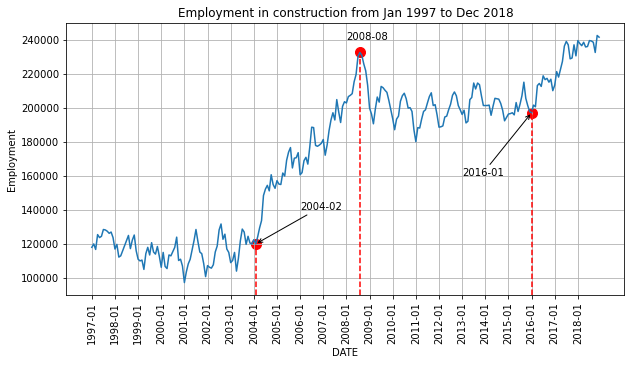

In [117]:
plt.figure(figsize=(10,5))
g = sns.lineplot(x='DATE', y='Employment', data = construction)
g.set_xticks([*range(0,264,12)])
g.set_xticklabels([dat for dat in construction.DATE if '-01' in dat], rotation = 90)
g.set_title('Employment in construction from Jan 1997 to Dec 2018')
plt.scatter(x=['2004-02', '2008-08', '2016-01'], y=[120000, 232750, 197250], c='r', s=100)
plt.axvline(x='2004-02', ymax=0.18, linestyle='--', color='r')
plt.axvline(x='2008-08', ymax=0.88, linestyle='--', color='r')
plt.axvline(x='2016-01', ymax=0.68, linestyle='--', color='r')
plt.annotate('2004-02', xy=('2004-02', 120000), xytext=('2006-01', 140000), arrowprops={'arrowstyle':'->'})
plt.annotate('2016-01', xy=('2016-01', 197250), xytext=('2013-01', 160000), arrowprops={'arrowstyle':'->'})
plt.annotate('2008-08', xy=('2008-08', 232750), xytext=('2008-01', 240000))
plt.grid()
plt.show()

There are four different sections in the evolution of employment rate in construction from $1997$ to $2018$. Two sections of global steadiness (**Jan 1997** $-$ **Feb 2004** and **Aug 2008** $-$ **Jan 2016**) during which the employment rate oscillates around a certain constant, and two section of steep increase (**Feb 2004** $-$ **Aug 2008** and  **Jan 2016** $-$ **Dec 2018**).

#### b. Comparison of emplyment in construction with overall employment

In [118]:
df_total_per_date = df_out.groupby('DATE').agg({'Employment':np.sum})
df_total_per_date['Construction_emp(%)'] = (construction.Employment).values * 100 /df_total_per_date.Employment.values
df_total_per_date['Construction_emp(%)'] = df_total_per_date['Construction_emp(%)'].apply(lambda x : round(x,2))
df_total_per_date.head()

,Employment,Construction_emp(%)
DATE,,
1997-01,1800250,6.55
1997-02,1810000,6.63
1997-03,1815750,6.43
1997-04,1829250,6.86
1997-05,1869000,6.62


In [119]:
df_total_per_date[df_total_per_date['Construction_emp(%)'] == df_total_per_date['Construction_emp(%)'].max()]

,Employment,Construction_emp(%)
DATE,,
2008-08,2275250,10.23
2008-09,2258250,10.23


In [120]:
df_total_per_date[df_total_per_date['Construction_emp(%)'] == df_total_per_date['Construction_emp(%)'].min()]

,Employment,Construction_emp(%)
DATE,,
2001-01,1877250,5.18


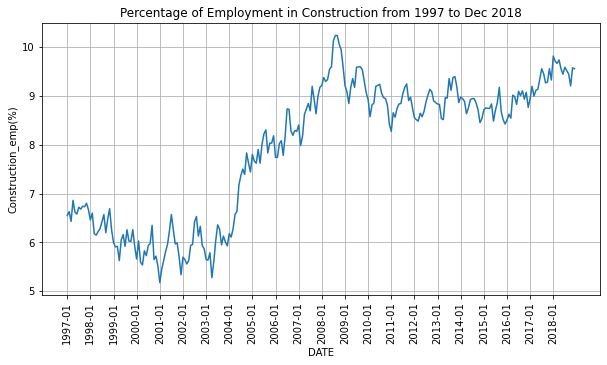

In [121]:
plt.figure(figsize = (10,5))
g = sns.lineplot(y='Construction_emp(%)', x='DATE', data=df_total_per_date)
g.set_xticks([*range(0,264,12)])
g.set_xticklabels([dat for dat in construction.DATE if '-01' in dat], rotation = 90)
g.set_title('Percentage of Employment in Construction from 1997 to Dec 2018')
plt.grid()
plt.show()

We notice that the portion of employment in construction follows the same fashion like the evolution of employment in condtruction with a maximum value of $10.23\%$ in **Aug 2008**, just at the end of the first steep increase region of the employment in construction. In contrast, the lowest value was registered in **Jan 2001**, with only $5.18\%$.

### III.2. When (Year) was the employment rate the highest between the dedicated time frame?

In [125]:
df_out['DATE'] = pd.to_datetime(df_out['DATE'])

In [126]:
emp_year = df_out.groupby(df_out.DATE.dt.year).agg({'Employment':sum})
# emp_year = df_out.groupby('DATE').agg({'Employment':sum})
emp_year.reset_index()
emp_year.head()

,Employment
DATE,
1997,22337000
1998,22347250
1999,22697000
2000,23217250
2001,23041250


In [127]:
emp_year.query('Employment==Employment.max()')

,Employment
DATE,
2018,29922000


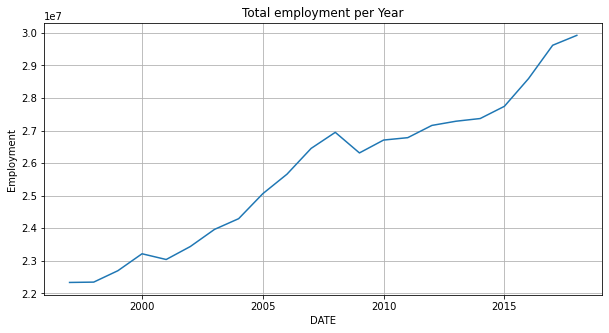

In [128]:
plt.figure(figsize=(10,5))
sns.lineplot(x=emp_year.index, y='Employment', data =emp_year)
plt.title('Total employment per Year')
plt.grid()
plt.show()

As we would have expected, $2018$ is the year with the largest employment rate with a total of $29922000$ employees.

### III.3. Which industry sector, subsector or industry group has had the highest number of employees?

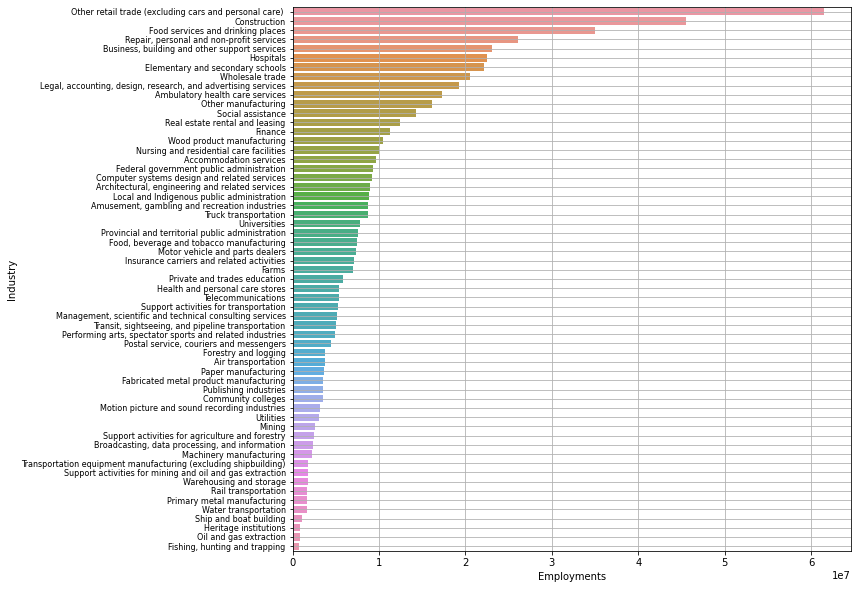

In [129]:
total_counts = df_out.groupby('LMO_Detailed_Industry')['Employment'].sum().sort_values(ascending=False)
total_df = pd.DataFrame({'Industry':total_counts.index, 'Employments':total_counts.values})
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x='Employments', y='Industry', data = total_df)
ax.tick_params(axis='y', labelsize=8) 
plt.grid()
plt.show()

Let's find the number of digits in the NAICS code of **Other retail trade (excluding cars and personal care)** and the number of industry subsectors involved.

In [130]:
df_lmo[df_lmo['LMO_Detailed_Industry']==total_df.head(1).Industry.item()].code_len.item()

3

In [131]:
df_lmo[df_lmo['LMO_Detailed_Industry']==total_df.head(1).Industry.item()].NAICS.item()

[442, 443, 444, 445, 446, 447, 448, 451, 452, 453, 454]

As shown by the above figure, **Other retail trade (excluding cars and personal care)** is the industry subsector (three digits NAICS) with the largest number of employees. However, this category indludes $11$ different industry subsectors, so **construction** is definitely the industry sector that employs most people.

### III.4. As a rapidly developping field, if Data Science industry level (Number of digits) in NAICS, is less or equal to 4 then how has Data Science employment evolved over time? Otherwise, What is the lowest industry level above Data Science and how did it evolve from 1997 to 2019? 

Data Science NAICS code is $518210$ and its lowest industry sector included in our data (four digit NAICS) is $5182$, the name being **Data processing, hosting, and related services**. [[1]](#naics1), [[2]](#naics2)

In [133]:
data_science = df4[df4.NAICS_CODE == 5182][['_EMPLOYMENT_', 'DATE']].reset_index()
data_science.drop('index', axis=1, inplace=True)
data_science.head()

,_EMPLOYMENT_,DATE
0,2000,1997-01
1,1250,1997-02
2,1000,1997-03
3,1500,1997-04
4,1750,1997-05


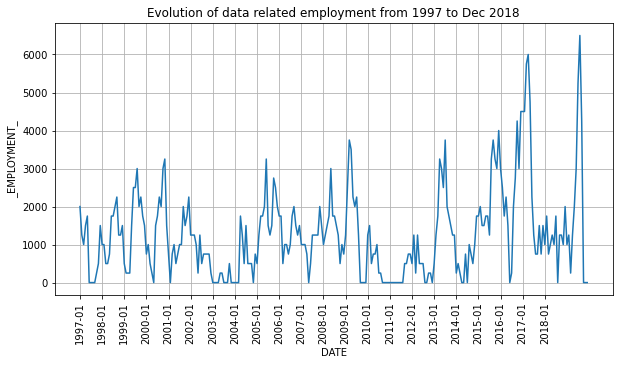

In [134]:
plt.figure(figsize = (10,5))
g = sns.lineplot(y='_EMPLOYMENT_', x='DATE', data=data_science)
g.set_xticks([*range(0,264,12)])
g.set_xticklabels([dat for dat in construction.DATE if '-01' in dat], rotation = 90)
g.set_title('Evolution of data related employment from 1997 to Dec 2018')
plt.grid()
plt.show()

In [135]:
data_science.query('_EMPLOYMENT_ ==_EMPLOYMENT_.max()')

,_EMPLOYMENT_,DATE
271,6500,2019-08


We observe that the data-related employment remain quite globally constant until $2013$ then has increased until mid $2017$ when it became steady at a relatively low value, before reaching the peak of $6500$ employees in **Aug 2018**. 

### III.5. Are there industry sectorsn subsectors or industry groups for which the employment rate decreased over time?
To answer this question, we will plot the time series evolution of all the $59$ industries included in our data.

In [136]:
data_out = pd.DataFrame(df_out.reset_index().groupby(['LMO_Detailed_Industry', 'DATE'], as_index=False)['Employment'].sum())
data_out = data_out.pivot('DATE', 'LMO_Detailed_Industry', 'Employment')
data_out.index.freq = 'MS'
data_out.fillna(0, inplace=True)
data_out.plot(subplots=True, figsize=(10, 120))
plt.show()

At first sight, the employment rate in the following industries decreased over time:
- Wood product manufacturing
- Telecommunications
- Support activities for agriculture and forestery
- Rail trandportation
- Primary metal manufacturing
- Paper manufacturing
- Fishing, hunting and traping

What would be the potential factors that caused the employment to decrease in those industries from $1997$ to $2018$? <br>
Additionally, these visualizations are very cumbersom, a dashboard for optimieing their look and presentation is under building. 

## References
 <a id="/naics" ></a> [1] [North American Industry Classification System (NAICS) Canada](www.statcan.gc.ca), 2017 Version 1.0,  P. $48$

 <a id="/naics2" ></a> [2] [NAICS code description](https://www.naics.com/naics-code-description/?code=518210)
 